In [6]:
import pandas as pd
import datetime

def get_historical_data(symbol,start_date,end_date):
    ''' Daily quotes from Google. Date format='yyyy-mm-dd' '''
    symbol = symbol.upper()
    start = datetime.date(int(start_date[0:4]), int(start_date[5:7]), int(start_date[8:10]))
    end = datetime.date(int(end_date[0:4]), int(end_date[5:7]), int(end_date[8:10]))
    url_string = 'C:/Users/Admin/Desktop/stack market price/Stock-Price-Predictor-master/google.csv'
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv(url_string, header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

In [7]:
data = get_historical_data('google','2015-10-10','2020-06-10') 

In [8]:
data.to_csv('google.csv',index = False)

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


        Date       Open       High        Low      Close  Volume
0  24.620001  24.690001  24.240000  24.389999  23.132627   73400
1  24.410000  24.570000  24.260000  24.400000  23.142111   83100
2  24.469999  24.520000  24.209999  24.350000  23.094683  126000
3  24.180000  24.270000  23.670000  23.680000  22.459227   87800
4  23.830000  24.080000  23.700001  23.879999  22.648911   42400


Open   --- mean : 23.331127851469414   	 Std:  3.3400019310504794   	 Max:  29.110001   	 Min:  14.32
High   --- mean : 22.772549621922142   	 Std:  3.41563743709258   	 Max:  28.84   	 Min:  13.54
Low    --- mean : 23.04206511358222   	 Std:  3.3871797024475248   	 Max:  28.93   	 Min:  13.8
Close  --- mean : 22.29007621048449   	 Std:  3.1556477372890503   	 Max:  28.035288   	 Min:  13.732220000000002
Volume --- mean : 112801.42970611596   	 Std:  82559.09582208323   	 Max:  846900   	 Min:  11700


In [10]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item       Open      Close  Volume
0     0  19.219999  18.670000   91900
1     1  19.260000  18.980000  203100
2     2  19.389999  19.120001  213100
3     3  19.280001  19.170000  156000
4     4  19.450001  18.990000   99000
---
      Item       Open      Close  Volume
1254  1254  24.080000  22.648911   42400
1255  1255  24.270000  22.459227   87800
1256  1256  24.520000  23.094683  126000
1257  1257  24.570000  23.142111   83100
1258  1258  24.690001  23.132627   73400


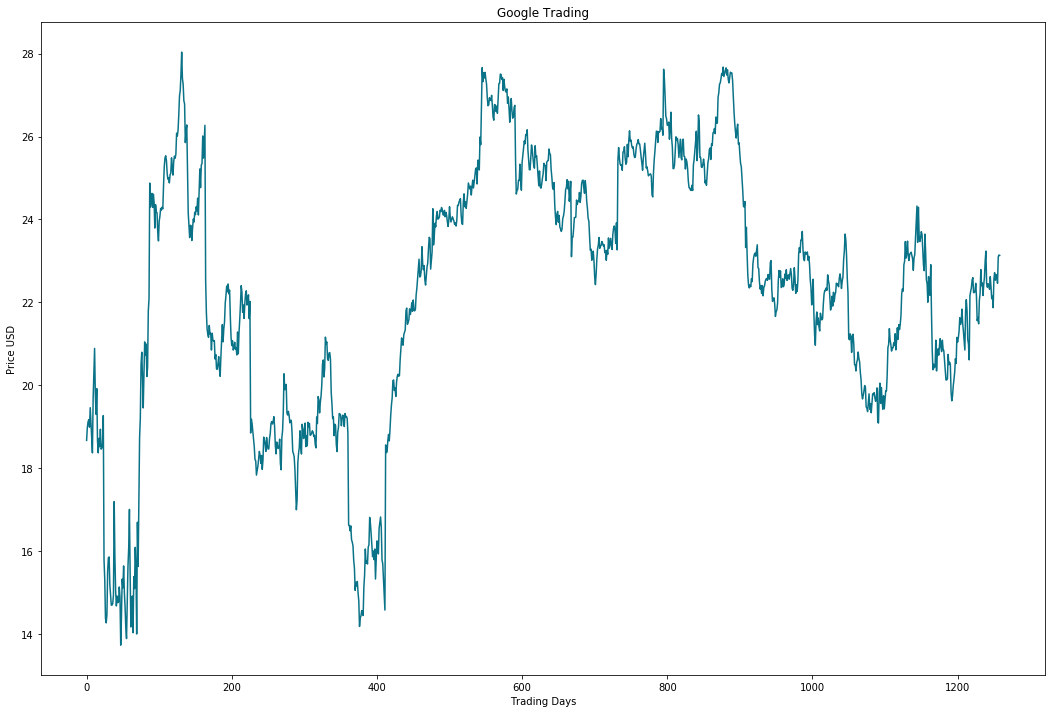

In [11]:
import visualize

visualize.plot_basic(stocks)

In [12]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.331305  0.345225  0.096025
1     1  0.334009  0.366899  0.229167
2     2  0.342799  0.376687  0.241140
3     3  0.335362  0.380183  0.172773
4     4  0.346856  0.367598  0.104526


Open   --- mean : 0.6092716188098578   	 Std:  0.2258283776350307   	 Max:  0.9999999999999999   	 Min:  0.0
Close  --- mean : 0.5983231157458313   	 Std:  0.22062733235198587   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.12105056238759088   	 Std:  0.0988494921241418   	 Max:  0.9999999999999999   	 Min:  0.0


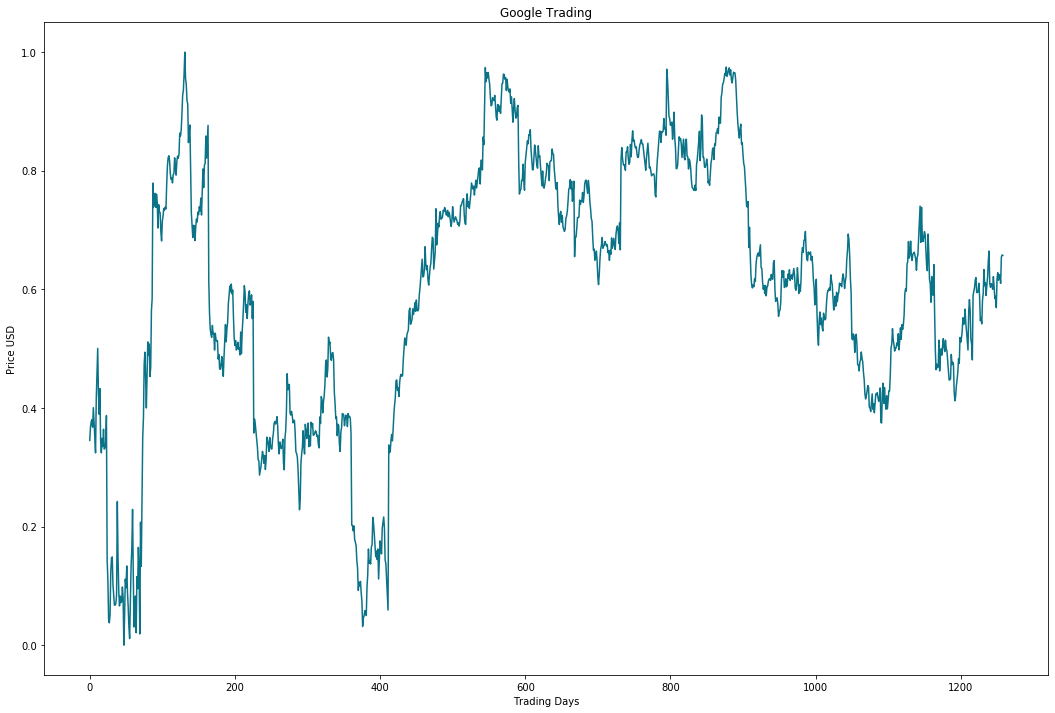

In [13]:
visualize.plot_basic(stocks)

In [14]:
stocks.to_csv('google_preprocessed.csv',index= False)

In [15]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.331305,0.345225,0.096025
1,1,0.334009,0.366899,0.229167
2,2,0.342799,0.376687,0.241140
3,3,0.335362,0.380183,0.172773
4,4,0.346856,0.367598,0.104526


In [16]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (863, 1)
y_train (863, 1)
x_test (396, 1)
y_test (396, 1)


In [17]:
model = LinearRegressionModel.build_model(X_train,y_train)

In [18]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

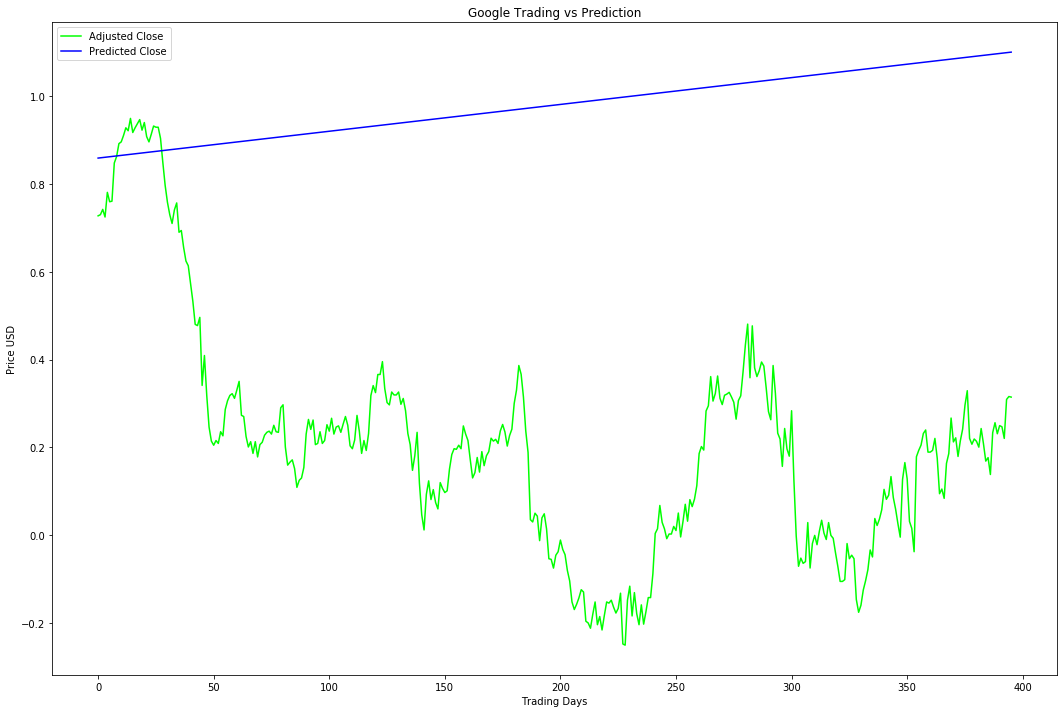

In [19]:
vs.plot_prediction(y_test,predictions)

In [20]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.4230 MSE (0.6504 RMSE)
Test Score: 0.68628831 MSE (0.82842520 RMSE)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('C:/Users/Admin/Desktop/stack market price/Stock-Price-Predictor-master/google_preprocessed.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [28]:
print (dataset_train)
print (training_set)

      Item      Open     Close    Volume
0        0  0.331305  0.345225  0.096025
1        1  0.334009  0.366899  0.229167
2        2  0.342799  0.376687  0.241140
3        3  0.335362  0.380183  0.172773
4        4  0.346856  0.367598  0.104526
...    ...       ...       ...       ...
1254  1254  0.659905  0.623411  0.036758
1255  1255  0.672752  0.610149  0.091116
1256  1256  0.689655  0.654577  0.136853
1257  1257  0.693036  0.657893  0.085489
1258  1258  0.701149  0.657230  0.073875

[1259 rows x 4 columns]
[[0.33130485]
 [0.33400944]
 [0.3427991 ]
 ...
 [0.68965513]
 [0.69303579]
 [0.70114945]]


In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [32]:
X_train = []
y_train = []
for i in range(60, 246):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs =100, batch_size = 32)



Epoch 1/100
6/6 [==============================] - 1s 99ms/step - loss: 0.1951
Epoch 2/100
6/6 [==============================] - 1s 91ms/step - loss: 0.0519
Epoch 3/100
6/6 [==============================] - 1s 91ms/step - loss: 0.0421
Epoch 4/100
6/6 [==============================] - 1s 90ms/step - loss: 0.0301
Epoch 5/100
6/6 [==============================] - 1s 92ms/step - loss: 0.0309
Epoch 6/100
6/6 [==============================] - 1s 91ms/step - loss: 0.0263
Epoch 7/100
6/6 [==============================] - 1s 92ms/step - loss: 0.0231
Epoch 8/100
6/6 [==============================] - 1s 93ms/step - loss: 0.0231
Epoch 9/100
6/6 [==============================] - 1s 91ms/step - loss: 0.0231
Epoch 10/100
6/6 [==============================] - 1s 93ms/step - loss: 0.0214
Epoch 11/100
6/6 [==============================] - 1s 92ms/step - loss: 0.0194
Epoch 12/100
6/6 [==============================] - 1s 92ms/step - loss: 0.0192
Epoch 13/100
6/6 [==============================]

In [40]:
dataset_test =pd.read_csv('C:/Users/Admin/Desktop/stack market price/Stock-Price-Predictor-master/google_preprocessed.csv')
real_stock_price =  dataset_train.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20,246):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

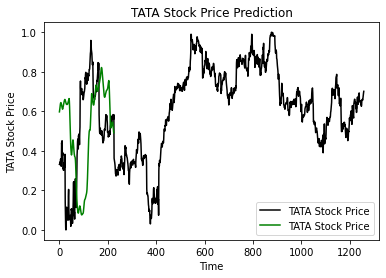

In [43]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()